In [2]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re

data=pd.read_csv ("train_1.csv")

#print(data.info())
#print(data.describe())
n=data.isnull().sum()
data_no_null=data.fillna(0)
#print(data_no_null.head())
print("done")



done


In [3]:
import re
def language_abb(page): 
    res = re.search('[a-z][a-z].wikipedia.org',page) 
    #print("res= ",res.group(0))
    if res: 
        return res.group(0)[0:2] 
    return 'na'

data['lang'] = data.Page.map(language_abb)
data["lang"]= data["lang"].replace(["en","ja",'de','na','fr','zh','ru','es'], ["English","Japanese",'German','WikiMedia','French','Chinese','Russian','Spanish'])

lang_count=data['lang'].value_counts()

print(lang_count)

print("done")

English      24108
Japanese     20431
German       18547
WikiMedia    17855
French       17802
Chinese      17229
Russian      15022
Spanish      14069
Name: lang, dtype: int64
done


done


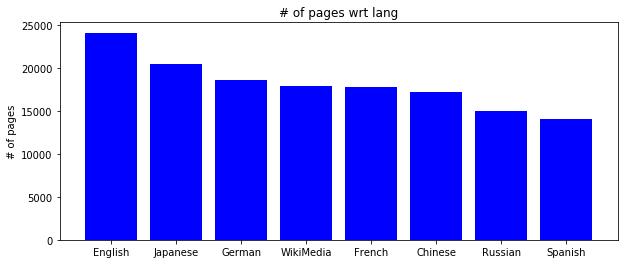

In [79]:


plt.figure(figsize=(10,4))
plt.xticks(np.arange(len(lang_count)),lang_count.index,rotation='horizontal')
plt.ylabel('# of pages')
plt.bar(np.arange(len(lang_count)),lang_count, color='b')
plt.title("# of pages wrt lang")
print("done")

In [8]:
name=["en","ja",'de','na','fr','zh','ru','es']
full_name=["English","Japanese",'German','WikiMedia','French','Chinese','Russian','Spanish']
lang_sets={}
for x in range(0,8):
    lang_sets[name[x]] = data[data.lang==full_name[x]].iloc[:,0:-1]
# Grouping dataframe langauge wise


In [9]:
for index in lang_sets:
    lang_sets[index]=lang_sets[index].drop(columns=['Page'])



In [10]:
null_num={}
t_sum={}
mean={}
meanperDay={}

for index in lang_sets:
    null_num[index]=lang_sets[index].isnull().sum()
    t_sum[index]=null_num[index].sum(axis=0)/550
    mean[index]=lang_sets[index].mean().mean()
   
    
#meanperDay
##total nullValues per language

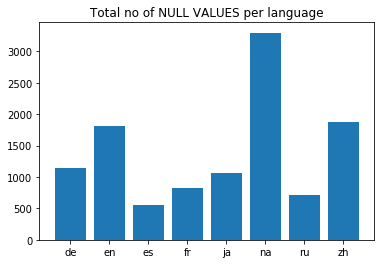

In [11]:
plt.bar(*zip(*sorted(t_sum.items())))
plt.title('Total no of NULL VALUES per language')
plt.show()



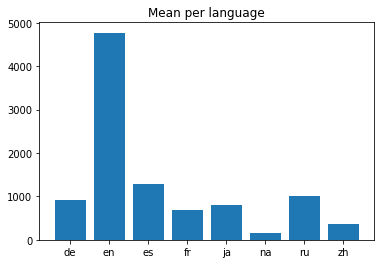

In [12]:
plt.bar(*zip(*sorted(mean.items())))
plt.title('Mean per language')
plt.show()

In [13]:
###REMOVING NULL VALUES BY FILLNA(0)

for index in lang_sets:
    lang_sets[index]=lang_sets[index].fillna(0)

In [14]:
sum_col = {}

for index in lang_sets:
    sum_col[index]=lang_sets[index].sum(axis=0) / lang_sets[index].shape[0]

    

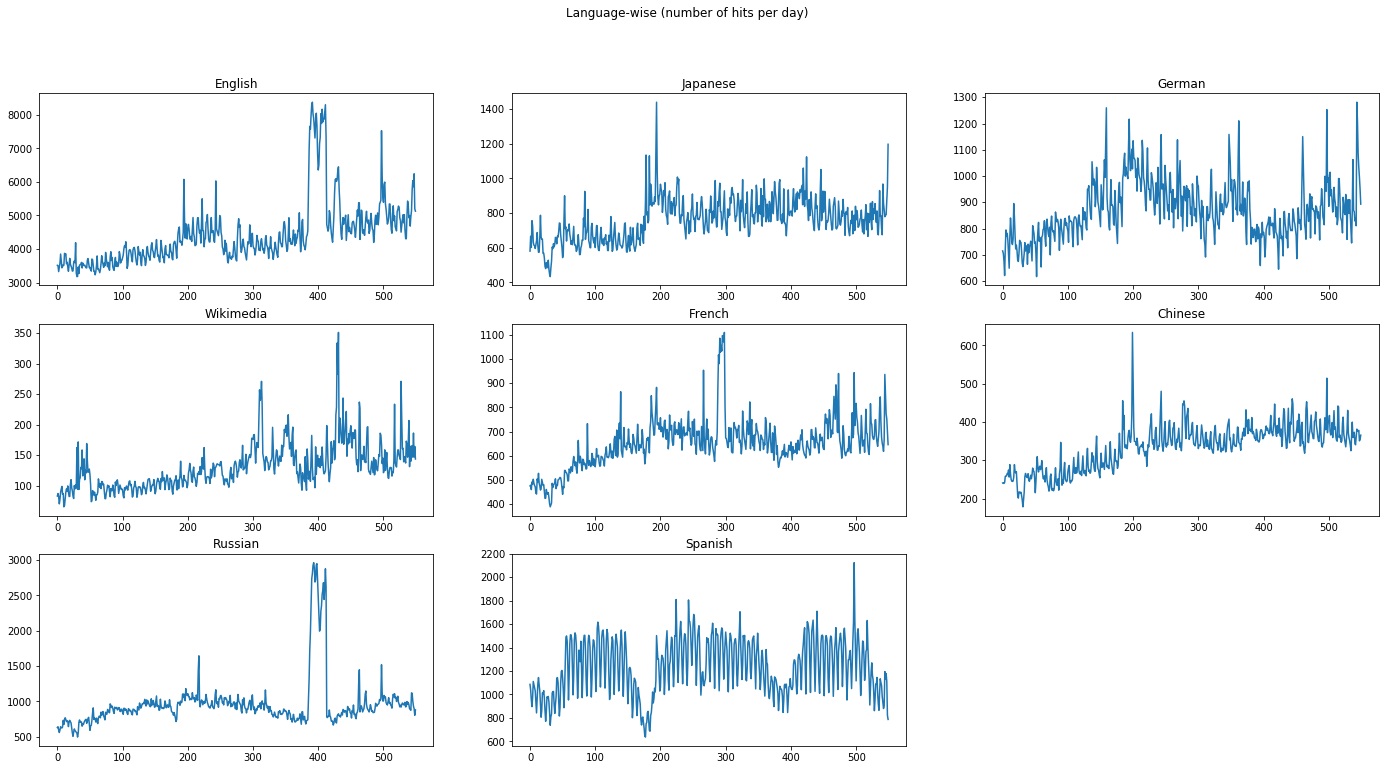

In [82]:


plt.figure(1, figsize=(24, 12))


plt.subplot(331)
plt.title('English')
plt.plot(sum_col["en"].values)


plt.subplot(332)
plt.title('Japanese')
plt.plot(sum_col["ja"].values)


plt.subplot(333)
plt.title('German')
plt.plot(sum_col["de"].values)


plt.subplot(334)
plt.title('Wikimedia')
plt.plot(sum_col["na"].values)


plt.subplot(335)
plt.title('French')
plt.plot(sum_col["fr"].values)


plt.subplot(336)
plt.title('Chinese')
plt.plot(sum_col["zh"].values)


plt.subplot(337)
plt.title('Russian')
plt.plot(sum_col["ru"].values)


plt.subplot(338)
plt.title('Spanish')
plt.plot(sum_col["es"].values)


plt.suptitle('Language-wise (number of hits per day)')
plt.show()

#sum_col["en"]


In [159]:
import math as math

def extract_language(df):
    size = int(len(df)-50)
    train_ds, test_ds = df[0:size], df[size:len(df)]
    df_train = pd.DataFrame({ 'Date':(train_ds.index),'Hits': (train_ds.values)})
    df_test = pd.DataFrame({ 'Date':(test_ds.index),'Hits': (test_ds.values)})
    
    
    return df_train, df_test

X_train, y_train = extract_language(sum_col["en"])# Change this one by on

#print("The training set sample:")
print(X_train.head())
#print("The validation set sample:")
print(y_train.head())

<class 'pandas.core.frame.DataFrame'>
         Date         Hits
0  2016-11-12  5393.884312
1  2016-11-13  5930.484652
2  2016-11-14  5996.837564
3  2016-11-15  5350.590053
4  2016-11-16  5190.772109


In [144]:
import numpy as np

def extract_seriesDF(df):
   # y = df.iloc[row_num, start_idx:]
    df = pd.DataFrame({ 'Date':(df.index),'Hits': (df.values)})
    return df

In [145]:
extract_seriesDF(X_train)   

,Date,Hits
0,2015-07-01,3513.862203
1,2015-07-02,3502.511407
2,2015-07-03,3325.357889
3,2015-07-04,3462.054256
4,2015-07-05,3575.520035
5,2015-07-06,3849.736021
6,2015-07-07,3643.523063
7,2015-07-08,3437.871080
8,2015-07-09,3517.459391
9,2015-07-10,3497.571594


In [146]:
extract_seriesDF(y_train)  

,Date,Hits
0,2016-11-12,5393.884312
1,2016-11-13,5930.484652
2,2016-11-14,5996.837564
3,2016-11-15,5350.590053
4,2016-11-16,5190.772109
5,2016-11-17,4951.469014
6,2016-11-18,4743.792890
7,2016-11-19,4796.249336
8,2016-11-20,4946.184379
9,2016-11-21,5346.322341


In [147]:
df1=pd.DataFrame( {'English':sum_col['en'],'Japanese':sum_col['ja'],'German':sum_col['de'],'WikiMedia':sum_col['na'],'French':sum_col['fr'],'Chinese':sum_col['zh'],'Russian':sum_col['ru'],'Spanish':sum_col['es']}  )

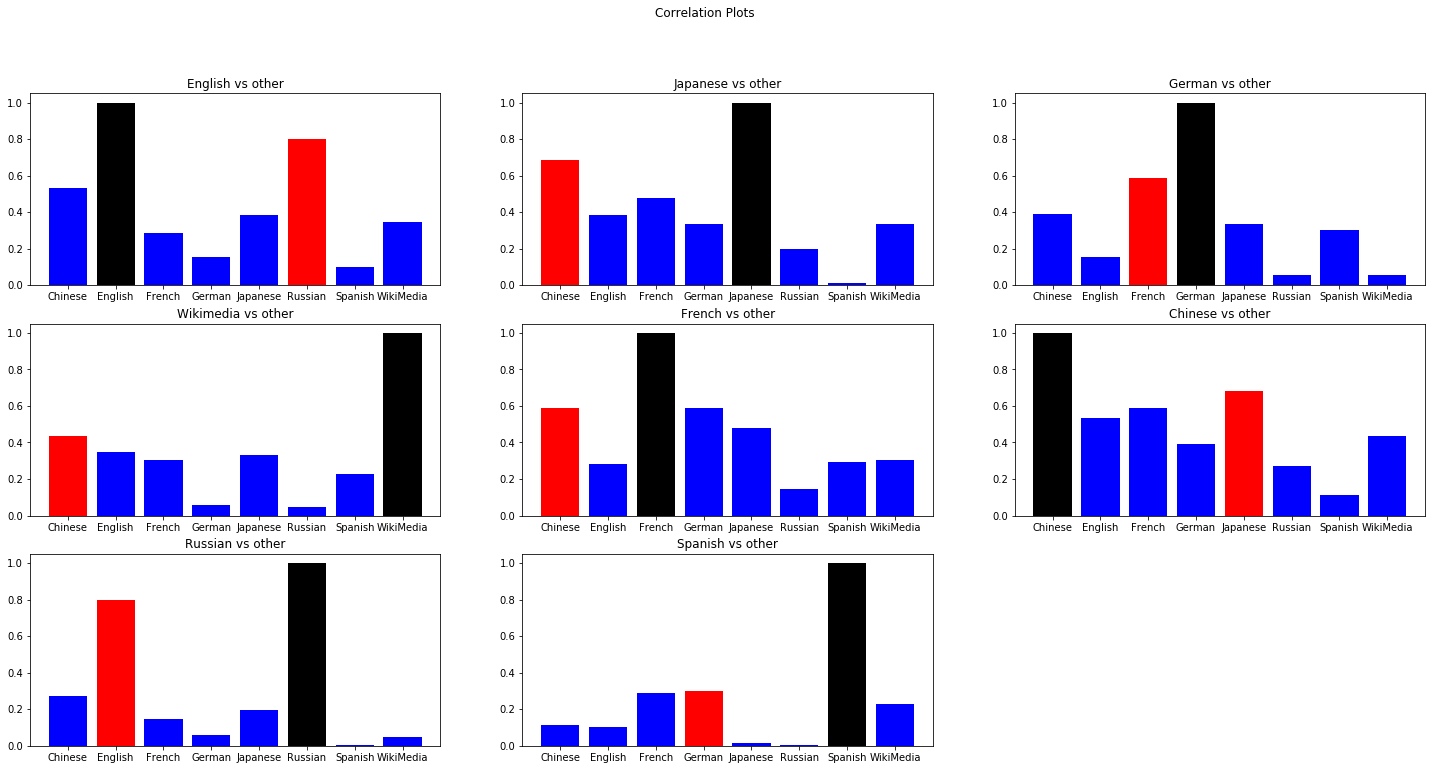

In [148]:
#plt.bar(df1.corrwith(df1.English).index,df1.corrwith(df1.English).values)
plt.figure(1, figsize=(25, 12))


plt.subplot(331)
plt.title('English vs other')
plt.bar(df1.corrwith(df1.English).index,df1.corrwith(df1.English).values,color='bkbbbrbb')


plt.subplot(332)
plt.title('Japanese vs other')
plt.bar(df1.corrwith(df1.Japanese).index,df1.corrwith(df1.Japanese).values,color='rbbbkbbb')


plt.subplot(333)
plt.title('German vs other')
plt.bar(df1.corrwith(df1.German).index,df1.corrwith(df1.German).values,color='bbrkbbbb')


plt.subplot(334)
plt.title('Wikimedia vs other')
plt.bar(df1.corrwith(df1.WikiMedia).index,df1.corrwith(df1.WikiMedia).values,color='rbbbbbbk')


plt.subplot(335)
plt.title('French vs other')
plt.bar(df1.corrwith(df1.French).index,df1.corrwith(df1.French).values,color='rbkbbbbb')


plt.subplot(336)
plt.title('Chinese vs other')
plt.bar(df1.corrwith(df1.Chinese).index,df1.corrwith(df1.Chinese).values,color='kbbbrbbb')


plt.subplot(337)
plt.title('Russian vs other')
plt.bar(df1.corrwith(df1.Russian).index,df1.corrwith(df1.Russian).values,color='brbbbkbb')


plt.subplot(338)
plt.title('Spanish vs other')
plt.bar(df1.corrwith(df1.Spanish).index,df1.corrwith(df1.Spanish).values,color='bbbrbbkb')


plt.suptitle('Correlation Plots')
plt.show()